# Exercise 10: Hierarchical clustering of the grain data

In the video, you learnt that the SciPy `linkage()` function performs hierarchical clustering on an array of samples.  Use the `linkage()` function to obtain a hierarchical clustering of the grain samples, and use `dendrogram()` to visualize the result.  A sample of the grain measurements is provided in the array `samples`, while the variety of each grain sample is given by the list `varieties`.


**Step 1:** Import:

 + `linkage` and `dendrogram` from `scipy.cluster.hierarchy`.
 + `matplotlib.pyplot` as `plt`.
 + `pandas`
 + `load_iris` and `train_test_split`

In [156]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, dendrogram

import matplotlib.pyplot as plt


**Step 2:** Load the dataset _(done for you)_.

In [157]:

iris_data = load_iris()


In [158]:
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [159]:
#Create pd DF the same way you did the first day
#Create the class and target columns and remove de cm from the columns names

def create_df():
    # YOUR CODE HERE
    df = pd.DataFrame(iris_data.data, columns = ['sepal length','sepal width','petal length', 'petal width'])
    df['target'] = iris_data.target
    df['class'] = iris_data.target_names[iris_data.target]

    return df
df_iris = create_df()
df_iris.sample(n=10)

,sepal length,sepal width,petal length,petal width,target,class
5,5.4,3.9,1.7,0.4,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
103,6.3,2.9,5.6,1.8,2,virginica
25,5.0,3.0,1.6,0.2,0,setosa
38,4.4,3.0,1.3,0.2,0,setosa
75,6.6,3.0,4.4,1.4,1,versicolor
89,5.5,2.5,4.0,1.3,1,versicolor
31,5.4,3.4,1.5,0.4,0,setosa
0,5.1,3.5,1.4,0.2,0,setosa
13,4.3,3.0,1.1,0.1,0,setosa


In [160]:
assert df_iris['sepal length'].shape == (150,)
assert df_iris['sepal width'].shape == (150,)
assert df_iris['petal length'].shape == (150,)
assert df_iris['petal width'].shape == (150,)
assert df_iris['target'].shape == (150,)
assert df_iris['class'].shape == (150,)

In [161]:

#From our data we will only get variable columns as np.array
x = 0
# YOUR CODE HERE
x = df_iris.values[:,:4]


In [162]:
assert x.shape == (150,4)

**Step 3:** Perform hierarchical clustering on `samples` using the `linkage()` function with the `method='complete'` keyword argument. Assign the result to `mergings`.

In [163]:

# YOUR CODE HERE
mergings = np.array(linkage(x, method='complete'))
print(mergings)


[[1.01000000e+02 1.42000000e+02 0.00000000e+00 2.00000000e+00]
 [7.00000000e+00 3.90000000e+01 1.00000000e-01 2.00000000e+00]
 [0.00000000e+00 1.70000000e+01 1.00000000e-01 2.00000000e+00]
 [9.00000000e+00 3.40000000e+01 1.00000000e-01 2.00000000e+00]
 [1.28000000e+02 1.32000000e+02 1.00000000e-01 2.00000000e+00]
 [1.00000000e+01 4.80000000e+01 1.00000000e-01 2.00000000e+00]
 [4.00000000e+00 3.70000000e+01 1.41421356e-01 2.00000000e+00]
 [1.90000000e+01 2.10000000e+01 1.41421356e-01 2.00000000e+00]
 [2.90000000e+01 3.00000000e+01 1.41421356e-01 2.00000000e+00]
 [5.70000000e+01 9.30000000e+01 1.41421356e-01 2.00000000e+00]
 [8.00000000e+01 8.10000000e+01 1.41421356e-01 2.00000000e+00]
 [1.16000000e+02 1.37000000e+02 1.41421356e-01 2.00000000e+00]
 [8.00000000e+00 3.80000000e+01 1.41421356e-01 2.00000000e+00]
 [3.00000000e+00 4.70000000e+01 1.41421356e-01 2.00000000e+00]
 [2.70000000e+01 2.80000000e+01 1.41421356e-01 2.00000000e+00]
 [8.20000000e+01 9.20000000e+01 1.41421356e-01 2.000000

In [164]:
assert mergings.shape == (149,4)

**Step 4:** Plot a dendrogram using the `dendrogram()` function on `mergings`, specifying the keyword arguments `labels=varieties`, `leaf_rotation=90`, and `leaf_font_size=6`.  Remember to call `plt.show()` afterwards, to display your plot.

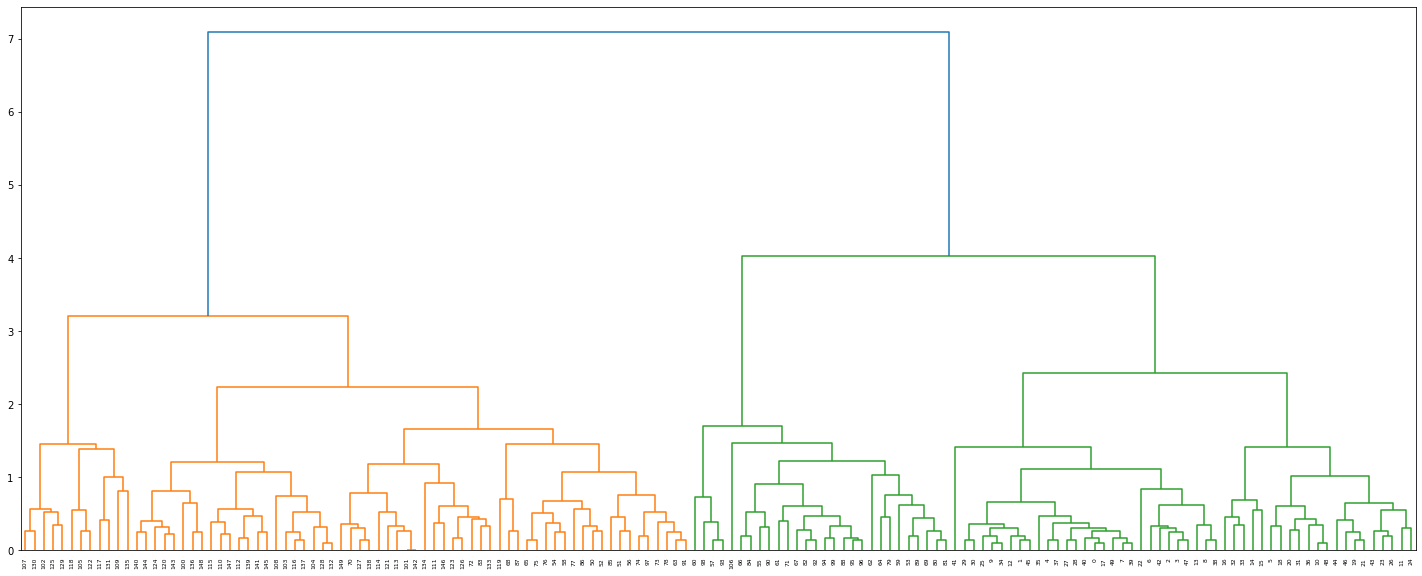

In [165]:
dn = 0
# YOUR CODE HERE
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(mergings, leaf_rotation=90, leaf_font_size= 6)
plt.show(dn)

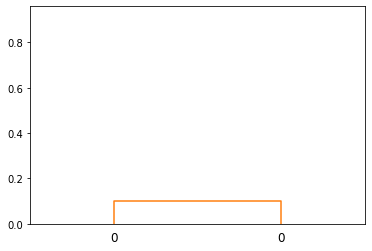

In [166]:
assert type(dn) == type(dendrogram(np.random.rand(15, 4)))

## K-MEANS

for this next part we will use the K-Means algorithm in order to cluster your data

**Step 1:** 
+ import `KMeans` from `sklearn.cluster`
+ loading our new datasets

In [225]:
from sklearn.cluster import KMeans

df = pd.read_csv('seeds.csv')
df = df.drop('grain_variety',axis=1)
points = df.values

new_df = pd.read_csv('seeds-less-rows.csv')
new_df = new_df.drop('grain_variety', axis=1)
new_points = new_df.values

new_df

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
1,14.69,14.49,0.8799,5.563,3.259,3.586,5.219
2,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
3,13.99,13.83,0.9183,5.119,3.383,5.234,4.781
4,14.11,14.26,0.8722,5.520,3.168,2.688,5.219
5,13.02,13.76,0.8641,5.395,3.026,3.373,4.825
6,15.49,14.94,0.8724,5.757,3.371,3.412,5.228
7,16.20,15.27,0.8734,5.826,3.464,2.823,5.527
8,13.50,13.85,0.8852,5.351,3.158,2.249,5.176
9,15.36,14.76,0.8861,5.701,3.393,1.367,5.132


**Step 2:** Using `KMeans()`, create a `KMeans` instance called `model` to find `3` clusters. To specify the number of clusters, use the `n_clusters` keyword argument


In [187]:
#new_df= new_df.drop('grain_variety', axis = 1)
# YOUR CODE HERE

model = KMeans(n_clusters=3).fit(points)
model


KMeans(n_clusters=3)

In [177]:
assert type(model)== type(KMeans())

**Step 4:** Use the `.fit()` method of `model` to fit the model to the array of points `points`.

In [178]:
# YOUR CODE HE



**Step 5:** Use the `.predict()` method of `model` to predict the cluster labels of `points`, assigning the result to `labels`.

In [210]:
# YOUR CODE HERE
labels = model.predict(points)
labels = np.array(labels)
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1])

In [212]:
assert labels[labels.argmax()] == 2
assert labels.shape == (210,)

In [216]:
# Make a function that returns 3 numpy arrays each one with the points associated for each class
#If the label is 0 they go into data_0
#If the label is 1 they go into data_1
#If the label is 2 they go into data_2
def separate_labels(labels, points):
    data_0 = []
    data_1 = []
    data_2 = []
    
    for n in range(labels.shape[0]):
        if labels[n] == 0:
            data_0.append(points[n])
        elif labels[n]==1:
            data_1.append(points[n])
        else:
            data_2.append(points[n])
    # YOUR CODE HERE
    return data_0,data_1,data_2


data_0,data_1,data_2 =separate_labels(labels, points)
data_0 = np.array(data_0)
data_1 = np.array(data_1)
data_2 =np.array(data_2)

In [217]:
assert abs(data_0.shape[0] - 94) <= 20
assert abs(data_1.shape[0] - 95) <= 20
assert abs(data_2.shape[0] - 111) <= 20

AssertionError: 

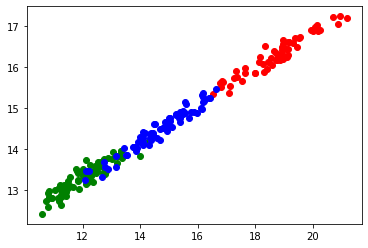

In [222]:
plt.scatter(data_0[:,0],data_0[:,1], c = "red", label="0")
plt.scatter(data_1[:,0],data_1[:,1], c = "green", label="1")
plt.scatter(data_2[:,0],data_2[:,1], c = "blue", label="2")

plt.show()


**Step 7:** Use the `.predict()` method of `model` to predict the cluster labels of `new_points`, assigning the result to `new_labels`.  Notice that KMeans can assign previously unseen points to the clusters it has already found!

In [226]:

# YOUR CODE HERE

new_labels = model.predict(new_points)

In [227]:
assert new_labels[new_labels.argmax()] == 2
assert new_labels.shape == (100,)

AssertionError: 

In [231]:
def separate_labels(labels, points):
    new0 = []
    new1 = []
    new2 = []
    
    for n in range(labels.shape[0]):
        if labels[n] == 0:
            new0.append(points[n])
        elif labels[n]==1:
            new1.append(points[n])
        else:
            new2.append(points[n])
    # YOUR CODE HERE
    return new0,new1,new2
new0, new1,new2 = separate_labels(new_labels, new_points)
new0 = np.array(new0)
new1 = np.array(new1)
new2 = np.array(new2)


In [232]:
assert abs(new_0.shape[0] - 34) <= 5
assert abs(new_1.shape[0] - 34) <= 5
assert abs(new_2.shape[0] - 34) <= 5

NameError: name 'new_0' is not defined

<function matplotlib.pyplot.show(close=None, block=None)>

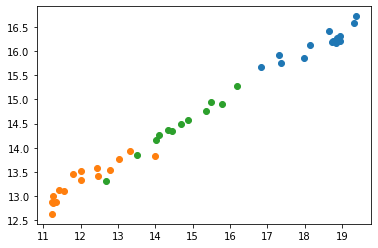

In [234]:
#plot the new labels
plt.scatter(new0[:,0], new0[:,1])
plt.scatter(new1[:,0], new1[:,1])
plt.scatter(new2[:,0], new2[:,1])

plt.show

# YOUR CODE HERE


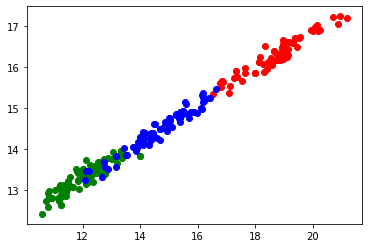

In [238]:
#plot all the points together
plt.scatter(new0[:,0],new0[:,1], c = "red", label="0")
plt.scatter(new1[:,0],new1[:,1], c = "green", label="1")
plt.scatter(new2[:,0],new2[:,1], c = "blue", label="2")

plt.scatter(data_0[:,0],data_0[:,1], c = "red", label="0")
plt.scatter(data_1[:,0],data_1[:,1], c = "green", label="1")
plt.scatter(data_2[:,0],data_2[:,1], c = "blue", label="2")
# YOUR CODE HERE
